# Counterfactual Data Substitution (CDS)

In [3]:
# imports
import os
os.chdir("g:\\My Drive\\ITC, 5th semester (Thesis)\\Code\\Github_code\\toxicity_detection")

import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
from string import punctuation
import spacy
from spacy import displacy
from tqdm import tqdm
from utils import load_dkhate

In [4]:
# Load gender triplet dictionary from excel-file
gender_df = pd.read_excel(os.getcwd()+"\\mitigation\\gender_triplet_dict.xlsx")
gender_dict = gender_df.T.to_dict()
for i in range(5):
    print(gender_dict[i])

{'female': 'abbedisse', 'male': 'abbed', 'queer': 'KtM'}
{'female': 'abbedisser', 'male': 'abbeder', 'queer': "KtM'er"}
{'female': 'baronesse', 'male': 'baron', 'queer': 'MtK'}
{'female': 'baronesser', 'male': 'baroner', 'queer': "MtK'er"}
{'female': 'bedstemor', 'male': 'bedstefar', 'queer': 'demi person'}


[]

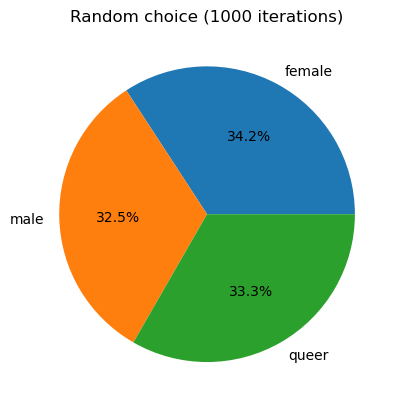

In [5]:
# check randomness of random.choice
storage = [random.choice(["female", "male", "queer"]) for i in range(1000)]

plt.pie(dict(Counter(storage)).values(), labels=dict(Counter(storage)).keys(), autopct='%1.1f%%')
plt.title("Random choice (1000 iterations)")
plt.plot()

0 male abbed
1 queer KtM'er
2 male baron
3 male baroner
4 male bedstefar
5 male bedstefædre
6 queer transvestit
7 female bitches
8 male bonussøn
9 female bonusdøtre
10 female bonusmor
11 male bonusfædre
12 queer ikke-binær partner
13 queer ikke-binære partnere
14 female dame
15 queer akønnede
16 male søn
17 female dronning
18 queer multikønnede
19 male dandy
20 queer intersex personer
21 female døtre
22 female enke
23 female enker
24 queer omnikønnet
25 female farmødre
26 female faster
27 female fastre
28 female forretningskvinde
29 queer personer med en flydende kønsidentitet
30 queer transmand
31 male gemaler
32 female grevinde
33 female grevinder
34 queer two-spirit
35 female gudinder
36 female heks
37 female hekse
38 queer pankønnet
39 male helte
40 male hertug
41 queer transfeminine personer
42 queer hen
43 female hende
44 queer hens
45 female hunkønsvæsen
46 queer intetkønnede
47 male husbond
48 queer queer partnere
49 male kejser
50 male kejsere
51 male ægtemand
52 female koner


[]

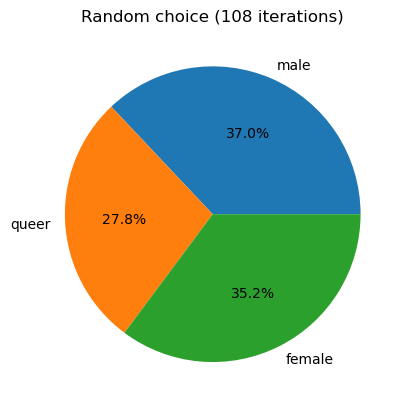

In [6]:
# test picking a random word for each triplet in the gender_dict

store_gs = []

for idx in gender_dict:
    g = random.choice(["female", "male", "queer"])
    print(idx, g, gender_dict[idx][g])
    store_gs.append(g)

# explore distribution
plt.pie(dict(Counter(store_gs)).values(), labels=dict(Counter(store_gs)).keys(), autopct='%1.1f%%')
plt.title("Random choice ({} iterations)".format(len(gender_dict)))
plt.plot()

In [7]:
# create some test data
test_data = pd.DataFrame([
    "baronessen Maria og badehotellet", 
    "fuck alle kvinder, særligt Maria", 
    "ugh, min mama er crazy", 
    "mama mia", 
    "jeg er nonbinær. Mit navn er Charlie.", 
    "sikke et åndssvagt pigebarn, hun burde skydes", 
    "du skal ik komme her hen, Clara-Maria!"], columns=["comment"])
test_data

,comment
0,baronessen Maria og badehotellet
1,"fuck alle kvinder, særligt Maria"
2,"ugh, min mama er crazy"
3,mama mia
4,jeg er nonbinær. Mit navn er Charlie.
5,"sikke et åndssvagt pigebarn, hun burde skydes"
6,"du skal ik komme her hen, Clara-Maria!"


In [8]:
def remove_punc(string):
    return string.translate(str.maketrans("", "", punctuation))

In [9]:
changed_dict = dict()

for text in test_data["comment"]:
    changed = False
    orig_text = text
    changes = []
    for word in text.split():
        word = remove_punc(word)
        for idx in gender_dict:
            if any(i == word for i in gender_dict[idx].values()):
                rd_substitution = random.choice(["female", "male", "queer"])
                new_word = gender_dict[idx][rd_substitution]
                text = text.replace(word, new_word)
                changed = True
                changes.append({"orig_word": word, "new_word": new_word, "new_text": text})
    if changed:
        changed_dict[orig_text] = changes

In [10]:
changed_dict

{'fuck alle kvinder, særligt Maria': [{'orig_word': 'kvinder',
   'new_word': 'enbys',
   'new_text': 'fuck alle enbys, særligt Maria'}],
 'ugh, min mama er crazy': [{'orig_word': 'mama',
   'new_word': 'mama',
   'new_text': 'ugh, min mama er crazy'}],
 'mama mia': [{'orig_word': 'mama',
   'new_word': 'person af det tredje køn',
   'new_text': 'person af det tredje køn mia'}],
 'jeg er nonbinær. Mit navn er Charlie.': [{'orig_word': 'nonbinær',
   'new_word': 'nonbinær',
   'new_text': 'jeg er nonbinær. Mit navn er Charlie.'}],
 'sikke et åndssvagt pigebarn, hun burde skydes': [{'orig_word': 'pigebarn',
   'new_word': 'trans',
   'new_text': 'sikke et åndssvagt trans, hun burde skydes'},
  {'orig_word': 'hun',
   'new_word': 'hun',
   'new_text': 'sikke et åndssvagt trans, hun burde skydes'}],
 'du skal ik komme her hen, Clara-Maria!': [{'orig_word': 'hen',
   'new_word': 'hun',
   'new_text': 'du skal ik komme her hun, Clara-Maria!'},
  {'orig_word': 'hen',
   'new_word': 'hen',
   

In [11]:
# remove name if it appears

In [12]:
nlp = spacy.load('da_core_news_lg')

c:\Users\love2\anaconda3\envs\thesis2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# test that it works as expected 
doc = nlp('Jeg hedder Maja Mittag. Jeg er fra Næstved, men bor i København nu. Måske jeg en dag flytter hjem. Jeg arbejder på Gyldendal, studerer på KU. Det er ok.') 
for tok in doc:
    if tok.ent_type_ != "": # i.e. if a tag is assigned to this POS
        print("{} {}".format(tok,tok.ent_type_))
displacy.render(doc, style="ent")

Maja PER
Mittag PER
Næstved LOC
København LOC
Gyldendal ORG
KU ORG


In [14]:
name_anonymous = dict()
counter = 0

for text in tqdm(test_data["comment"]):
    doc = nlp(text)
    #changed = False # to print changed sentences
    for token in doc:
        if token.ent_type_ == "PER":
            token = str(token) # otherwise it's a spacy token object
            
            if token not in name_anonymous: # this ensures that the same entity is given the same anonymization tag
                counter += 1
                name_anonymous[token] = "E"+str(counter)
            
            text = text.replace(token, name_anonymous[token]) # replace token with tag
            # changed = True
            print(text)
    # if changed:
    #     print(text)
    #print(text)

100%|██████████| 7/7 [00:00<00:00, 80.60it/s]

baronessen E1 og badehotellet
fuck alle kvinder, særligt E1
jeg er nonbinær. Mit navn er E2.
du skal ik komme her hen, E3!


In [15]:
# this was the case for the medium model, which also did not recognize e.g. "Clara-Maria", but it doesn't matter for the large model (da_core_news_lg)
# also, notice how Clara-Maria is recognized as her own name, not Maria. Cool. 

# XX sometimes capitalization matter!
# notice how "charlie" is not recognized as a name, while "Charlie" is

# doc = nlp('Jeg hedder Charlie. Jeg hedder charlie.') 
# for tok in doc:
#     print("{} {}".format(tok,tok.ent_type_))

## Do it for the actual values

In [16]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = load_dkhate(test_size=0.2)
train_orig = pd.DataFrame([X_train_orig, y_train_orig]).T
train_orig.tail()

,tweet,label
id,,
2378,Hørt!,0
1879,Min reaktion hvis jeg var Svensker,0
42,hey champ Vil du ikke smide et link til hvor d...,0
457,Hvis du melder en for vold eller voldtægt og d...,1
3108,"Vi betaler for omkring 4mb ned, 500kb op men f...",0


In [17]:
nlp = spacy.load('da_core_news_lg')

In [25]:
new_train_X = [] # for storing new training data

changes_dict = dict() # store changes (triplets)
total_changes = 0
all_new_words = []

name_anonymous_dict = dict() # store anonymization tags
anonymity_counter = 0
total_names_replaced = 0

for text in tqdm(train_orig["tweet"]):
    # print(text)
    
    text = text.lower()  # lowercase text
    
    # XX change names first, as it thinks enby is a person's name otherwise
    doc = nlp(text)
    for token in doc:
        if token.ent_type_ == "PER":
            token = str(token) # otherwise it's a spacy token object
            total_names_replaced += 1

            if token not in name_anonymous_dict: # this ensures that the same entity is given the same anonymization tag
                anonymity_counter += 1
                name_anonymous_dict[token] = "E"+str(anonymity_counter)

            text = text.replace(token, name_anonymous_dict[token]) # replace token with tag

    changed = False # keep track of whether things have been changed in this text
    orig_text = text
    changes = [] # keep track of changes

    for word in text.split():
        word = remove_punc(word) # remove punctuation

        for idx in gender_dict: # loop through gender dictionary
            if any(gender_word == word for gender_word in gender_dict[idx].values()): # if the word appears in the triplet
                rd_substitution = random.choice(["female", "male", "queer"])
                new_word = gender_dict[idx][rd_substitution] # pick any of the three words to substitute it with
                text = text.replace(word, new_word) # make the substitution

                # store changes
                changed = True
                changes.append({"orig_word": word, "new_word": new_word, "new_text": text})
                total_changes += 1
                all_new_words.append(new_word)

    if changed:
        changes_dict[orig_text] = changes

    new_train_X.append(text)

100%|██████████| 2631/2631 [00:46<00:00, 56.31it/s]


In [26]:
print("Number of changes (triplets):", total_changes)
print("Number of changes (names):", total_names_replaced)

Number of changes (triplets): 791
Number of changes (names): 338


In [ ]:
# when I first change triplets, then names:
# Number of changes (triplets): 793
# Number of changes (names): 339

# when I first change names, then triplets:
# Number of changes (triplets): 791
# Number of changes (names): 338

[]

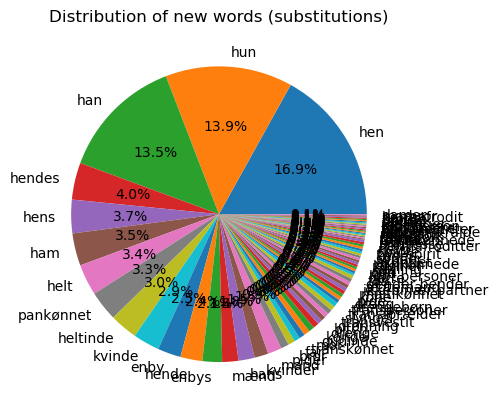

In [34]:
# distribution of new words (substitutions)
c = Counter(all_new_words).most_common() # sorted in descending order
plt.pie(dict(c).values(), labels=dict(c).keys(), autopct='%1.1f%%')
plt.title("Distribution of new words (substitutions)")
plt.plot()

In [35]:
# all new words
for k in Counter(all_new_words).keys():
    print(k)

ham
han
hen
hens
tøs
heltinde
herre
pankønnet
piger
kvinde
hendes
bror
transpersoner
enbys
helt
hun
lgbt personer
enby
gud
hende
mænd
drengebørn
drenge
kvinder
mand
bitch
dreng
pige
hans
dronning
far
søn
kone
multikønnet
transvestit
slyngel
kusine
fætter
transkønnet
kælling
transkønnede
ikkebinær partner
faster
kusiner
kvindfolk
mandfolk
farmor
ægtemand
datter
mor
rappenskralde
transforælder
søster
gudinde
transvestitter
nonbinære
pankønnede
akønnet
sønner
lgbt person
fader
gender bender
kællinger
konge
morfar
fædre
koner
prins
two-spirit
brødre
hermafrodit
morbror
søstre
nevø
hermafroditter
prinsesse
damer


In [36]:
# which names were replaced?
for k in name_anonymous_dict.keys():
    print(k)

kim
larsen
gu
hr.
lund
va
hej
bjarne
frederik
x.
ole
tøpholms
fuck
polandball
xd
patter
john
faxe
jensen
æhh
vm
trump
løkke
dean
martin
william
erobrens
usa
mary
thomas
vejgaard
fucking
heimdal
130k
ta
över
danmark
lite
snabbt
thors
godwin's
morten
gifv
meg
völdsömt
stödt
övar
räkkefölgan
äf
bögstäver
ï
adolf
hitler
lie
kaas
henrik
hansen
hr
holger
kurt
cobain-sagen
madsen
white
anders
lars
jason
peter
’
s
jesus
christ
theroux's
simon
spies
joakim
dårligt/
niels
stojberg
henriksen
ahlberg
donald
tyfonprins
juel
møn
dronning
margrethe
jakob
krænkelseskulturen
luxembourg
bruno
mars
marius
andersen
noah
trine
bramsens
egon
olsen
andrea
my
country
udspile
ukraine
aserbajdsjan
sidor
hävdar
fuglsang
em'92
mcdonald's
neger
frank
hvam
madsens
brian
saaby
longue
bohr
jørgen
leth
heia
norge
uw
fietsnetwerk
in
naam
van
willem
lene
blabla
vad
charles
vs.
freja
ollegard
gitte
^_______^
paul
mcjones
stroustrup
fogh
æ
bubber
rasmus
amager
tér
hvaøøøh
lassen
victoria
cross
costa
rica
ll
sådan-eller-så

In [37]:
train_orig

,tweet,label
id,,
3176,Hahaha,0
1440,@USER hvis du føler du har det svært så prøv a...,0
3501,Det er endnu en barriere for bønder uden for E...,0
3016,Mit eneste møde ved ham var på min snuskede st...,0
2399,Forøvrigt taget fra et godt dokumentarprogram ...,0
...,...,...
2378,Hørt!,0
1879,Min reaktion hvis jeg var Svensker,0
42,hey champ Vil du ikke smide et link til hvor d...,0


In [45]:
train_new = pd.DataFrame(zip(new_train_X, y_train_orig), columns=["text", "label"])
for t in train_new[train_new['label']==1]['text'][:20]:
    print(t)
    print()

her havde jeg scannet lortet ind på pc, markeret og taget hens underskrift over i et nyt dokument og skrevet det på korrekt engelsk. gad vide om han fik jobbet som vennetjeneste.

du kan klarer den tøs, stort set alle min venner er på vej ud på samme spor, hold kæft hvor føler jeg mig ensom, når alt folk omkring mig vil er at snakke drugs

fuck det, mere sol og varme, mindre regn please. 80% af de danske år er totalt lort, og så snart der kommer lidt sol så begynder alle at whine...

hvorfor i den fucking store helvede skal man fejre kristne helligdage for at blive dansker er danskere ikke vildt ateistiske jeg mener jeg kunne forstå om det var i afrika eller noget ekstremt kristent noget manden lever jo i en boble

der er ingen udlændinge ved grænsen, heller ikke kriminelle. de kan køre lige igennem den symbolske grænsekontrol. hvis man ikke kan komme på sygehuset uden at betale, så er det jo fordi at blå blok, anført af df, har indført brugerbetaling. for sådan går det, når nazister o

In [46]:
# a potential issue is that "fuck" is recognized as a name

{'kim': 'E1',
 'larsen': 'E2',
 'gu': 'E3',
 'hr.': 'E4',
 'lund': 'E5',
 'va': 'E6',
 'hej': 'E7',
 'bjarne': 'E8',
 'frederik': 'E9',
 'x.': 'E10',
 'ole': 'E11',
 'tøpholms': 'E12',
 'fuck': 'E13',
 'polandball': 'E14',
 'xd': 'E15',
 'patter': 'E16',
 'john': 'E17',
 'faxe': 'E18',
 'jensen': 'E19',
 'æhh': 'E20',
 'vm': 'E21',
 'trump': 'E22',
 'løkke': 'E23',
 'dean': 'E24',
 'martin': 'E25',
 'william': 'E26',
 'erobrens': 'E27',
 'usa': 'E28',
 'mary': 'E29',
 'thomas': 'E30',
 'vejgaard': 'E31',
 'fucking': 'E32',
 'heimdal': 'E33',
 '130k': 'E34',
 'ta': 'E35',
 'över': 'E36',
 'danmark': 'E37',
 'lite': 'E38',
 'snabbt': 'E39',
 'thors': 'E40',
 "godwin's": 'E41',
 'morten': 'E42',
 'gifv': 'E43',
 'meg': 'E44',
 'völdsömt': 'E45',
 'stödt': 'E46',
 'övar': 'E47',
 'räkkefölgan': 'E48',
 'äf': 'E49',
 'bögstäver': 'E50',
 'ï': 'E51',
 'adolf': 'E52',
 'hitler': 'E53',
 'lie': 'E54',
 'kaas': 'E55',
 'henrik': 'E56',
 'hansen': 'E57',
 'hr': 'E58',
 'holger': 'E59',
 'kurt': 